In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.python.client import device_lib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.models import load_model
import cv2
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, 
                            recall_score, f1_score, classification_report, 
                            matthews_corrcoef, cohen_kappa_score, 
                            balanced_accuracy_score, roc_auc_score, 
                            average_precision_score)
%matplotlib inline

In [2]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4632017261399816821
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 16266690560
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11684380558338896865
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
xla_global_id: 416903419
]


# loads the Fashion-MNIST training and test dataset

In [3]:
(x_train, y_train), (x_test, y_test)  = fashion_mnist.load_data()

In [4]:
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# analysis data

In [5]:

print(f"train data shape : {x_train.shape}")
print(f"test data shape : {x_test.shape}")
print(f"train label shape : {y_train.shape}")
print(f"test label shape : {y_test.shape}")

train data shape : (60000, 28, 28)
test data shape : (10000, 28, 28)
train label shape : (60000,)
test label shape : (10000,)


# Print the number of samples in our data

In [6]:

print ("Number of samples in our training data: " + str(len(x_train)))
print ("Number of labels in our training data: " + str(len(y_train)))
print ("Number of samples in our test data: " + str(len(x_test)))
print ("Number of labels in our test data: " + str(len(y_test)))

Number of samples in our training data: 60000
Number of labels in our training data: 60000
Number of samples in our test data: 10000
Number of labels in our test data: 10000


# visualize images from train data

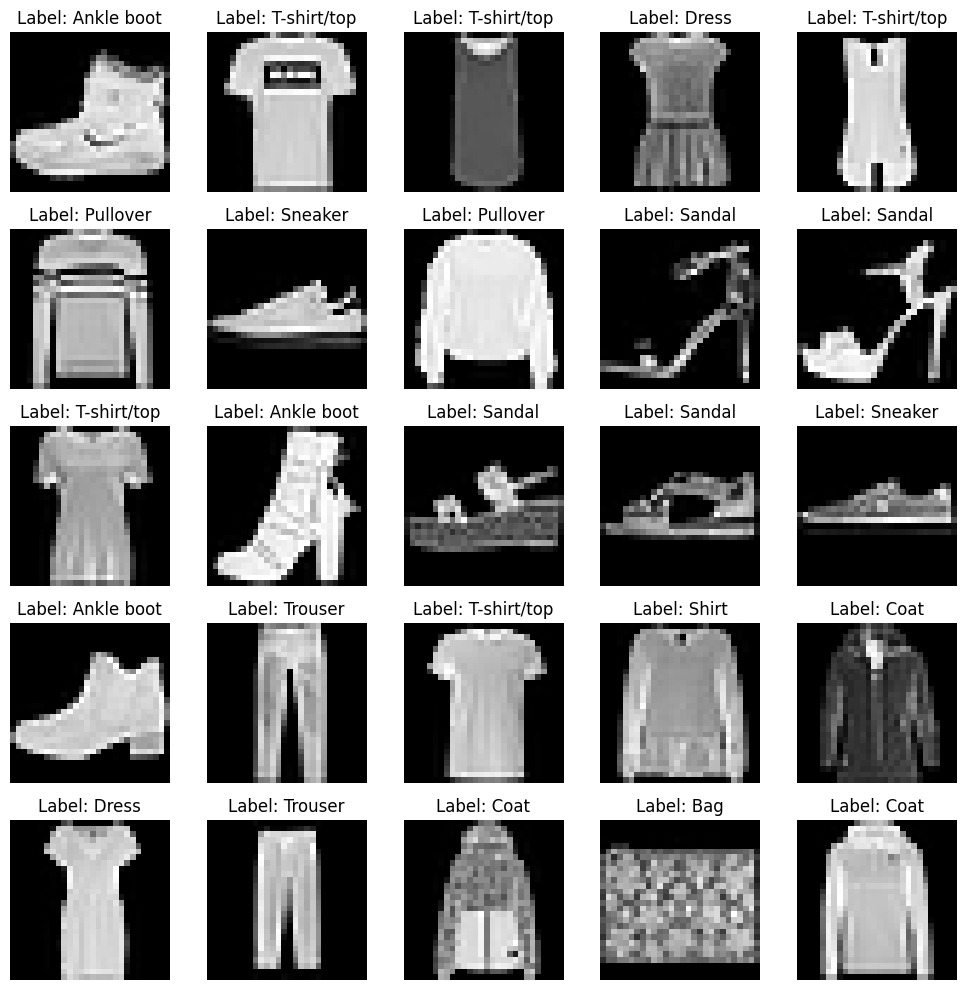

In [7]:

fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f'Label: {class_labels[y_train[i]]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

# plot some images again

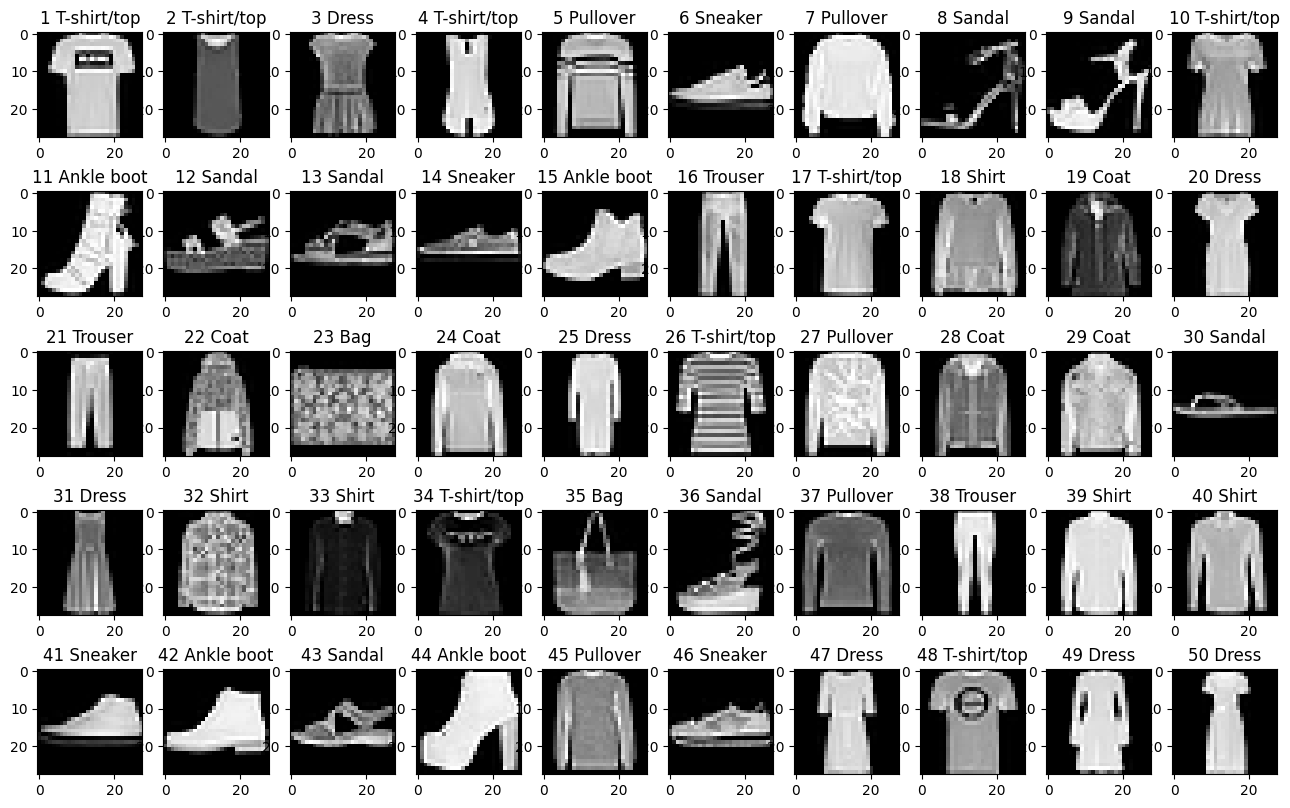

In [8]:
plt.figure(figsize=(16,10))
num_images=50
for index in range(1,num_images+1):
  class_names=class_labels[y_train[index]]
  plt.subplot(5,10,index)
  plt.imshow(x_train[index],cmap='gray')
  plt.title(f"{index} {class_names}")

plt.show()

# comapre each class length

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


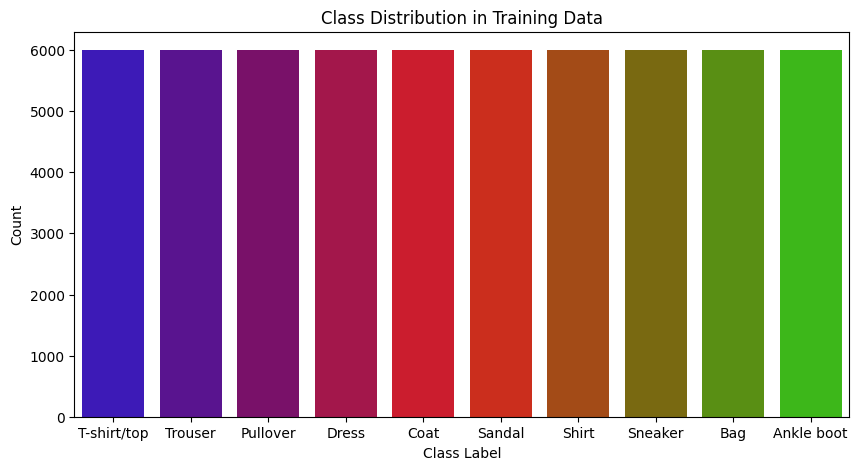

In [9]:

class_counts = np.bincount(y_train)

plt.figure(figsize=(10, 5))
sns.barplot(x=class_labels, y=class_counts, palette='brg')
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.title("Class Distribution in Training Data")
plt.show()

# compare each class length from test data

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


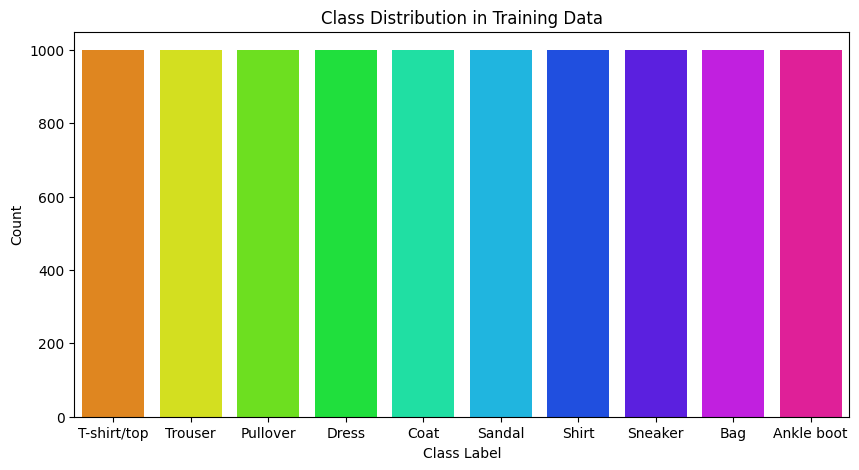

In [10]:
class_counts = np.bincount(y_test)

plt.figure(figsize=(10, 5))
sns.barplot(x=class_labels, y=class_counts, palette='hsv')
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.title("Class Distribution in Training Data")
plt.show()

# data preprocessing

In [11]:
img_rows=x_train[0].shape[0]
img_cols=x_train[0].shape[1]
input_shape=(img_rows,img_cols,1)
print(f"Input Shape : {input_shape}")

x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255.0
x_test/=255.0

print('x_train shape:', x_train.shape)
print("x_test shape :",x_test.shape)

Input Shape : (28, 28, 1)
x_train shape: (60000, 28, 28, 1)
x_test shape : (10000, 28, 28, 1)


### **One Hot Encode our Labels**
**Example of One Hot Encoding**
![Image of one hot ncoding](https://raw.githubusercontent.com/rajeevratan84/DeepLearningCV/master/hotoneencode.JPG)
Also, keep the number classes stored as a variable, ```num_classess```

In [12]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
num_classes

10

# Create Model

In [13]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=AdamW(learning_rate=0.001),metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

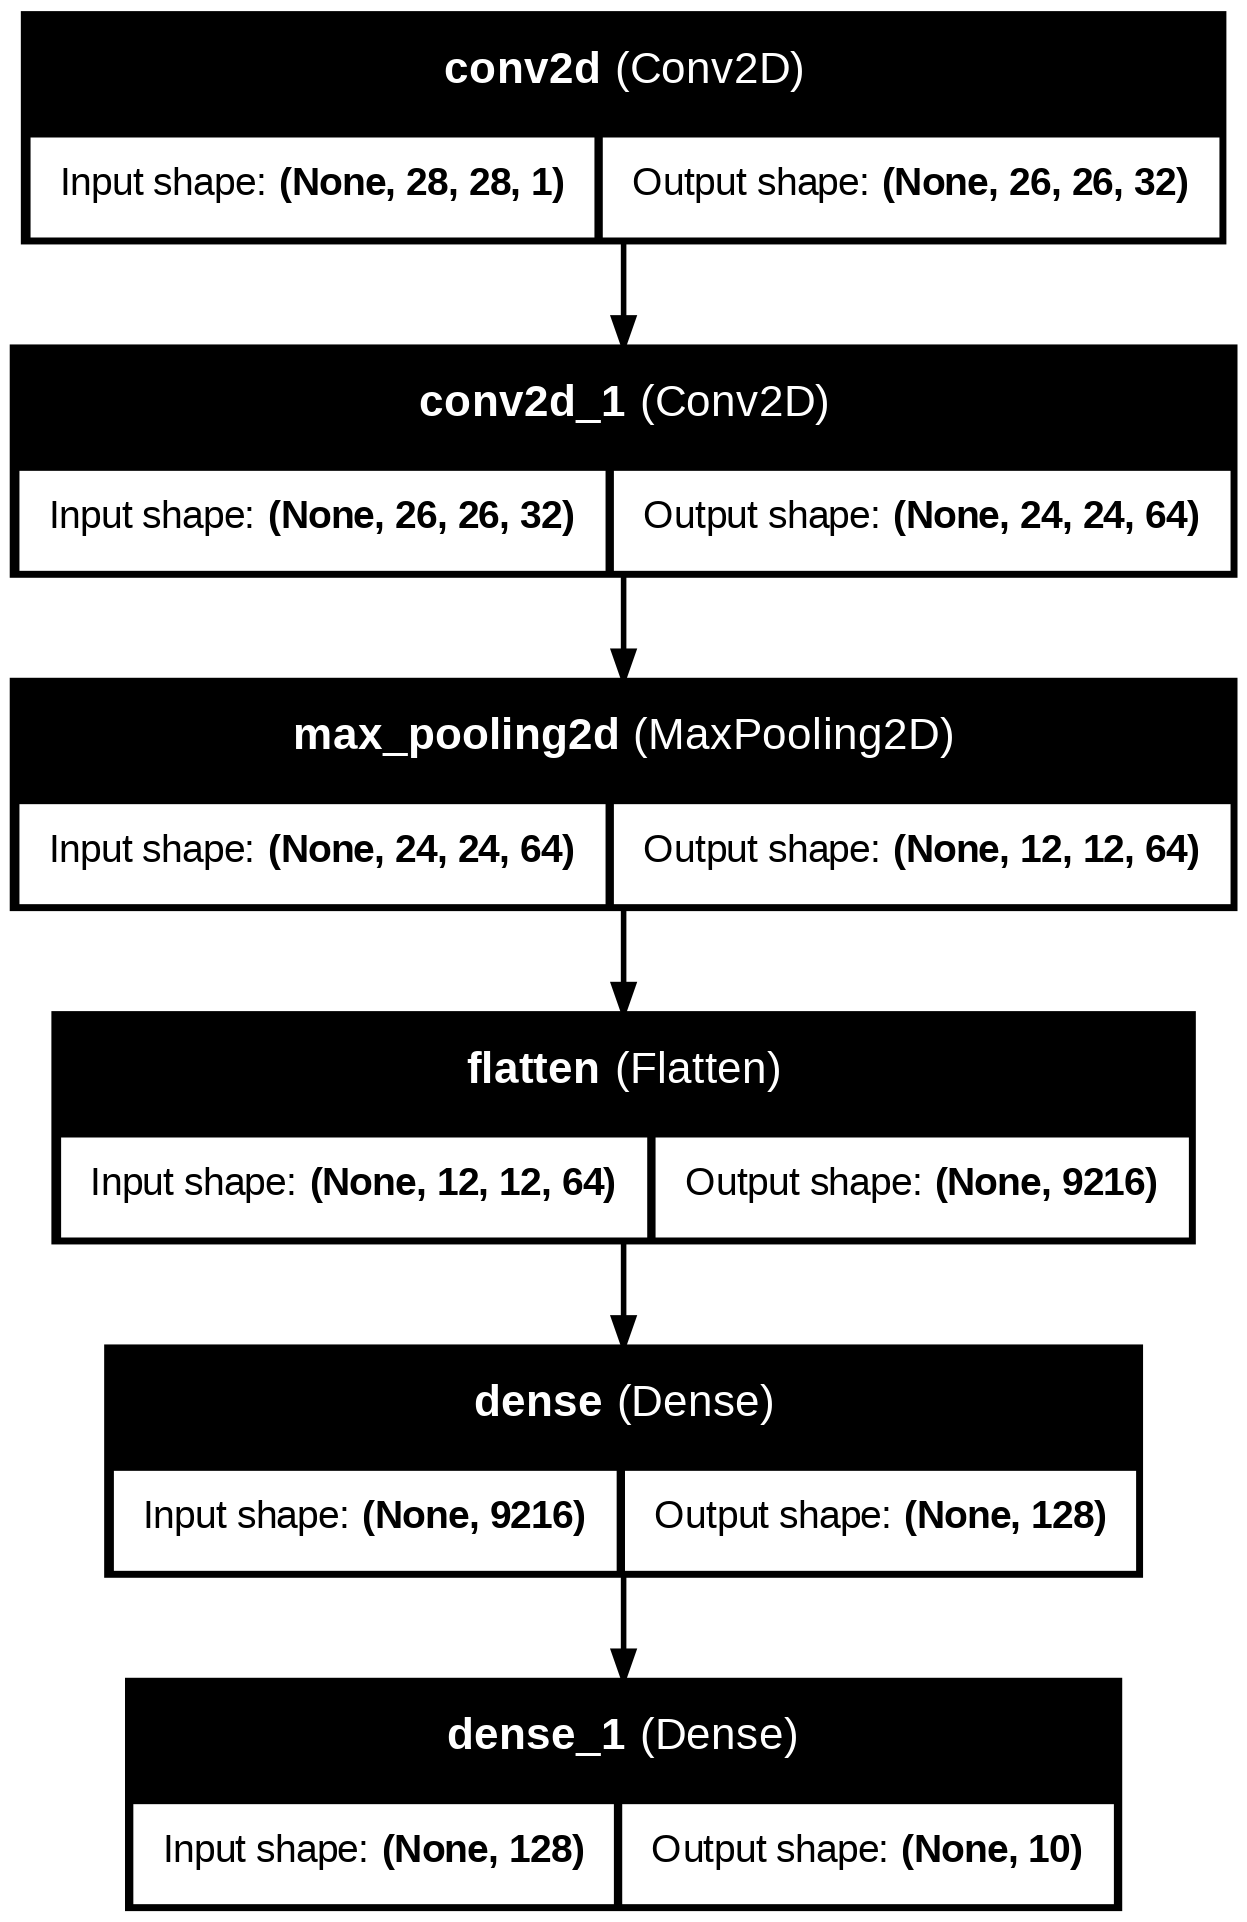

In [14]:

tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [15]:

history = model.fit(x_train,
                    y_train,
                    batch_size = 32,
                    epochs = 10,
                    verbose = 1,
                    validation_data = (x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8193 - loss: 0.5100 - val_accuracy: 0.8930 - val_loss: 0.2882
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9127 - loss: 0.2390 - val_accuracy: 0.9146 - val_loss: 0.2408
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9346 - loss: 0.1787 - val_accuracy: 0.9111 - val_loss: 0.2520
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9506 - loss: 0.1348 - val_accuracy: 0.9089 - val_loss: 0.2864
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9608 - loss: 0.1050 - val_accuracy: 0.9156 - val_loss: 0.2629
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9736 - loss: 0.0743 - val_accuracy: 0.9161 - val_loss: 0.3014
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9809 - loss: 0.0530 - val_accuracy: 0.9180 - val_loss: 0.3186
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9854 - loss: 0.0412 - 

# Loss & Accuracy Graph

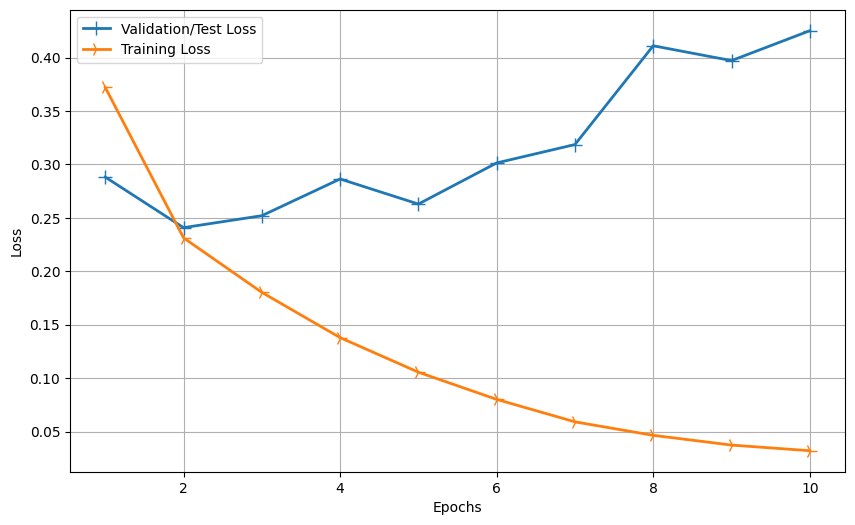

In [16]:

# Use the History object we created to get our saved performance results
history_dict = history.history

# Extract the loss and validation losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Get the number of epochs and create an array up to that number using range()
epochs = range(1, len(loss_values) + 1)

# Plot line charts for both Validation and Training Loss
plt.figure(figsize=(10, 6))
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

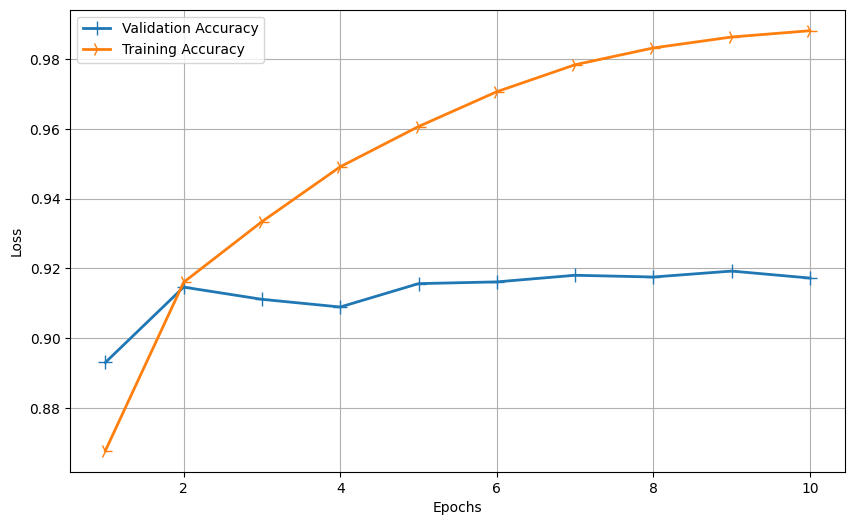

In [17]:
# Use the History object we created to get our saved performance results
history_dict = history.history

# Extract the loss and validation losses
train_accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

# Get the number of epochs and create an array up to that number using range()
epochs = range(1, len(loss_values) + 1)

# Plot line charts for both Validation and Training Loss
plt.figure(figsize=(10, 6))
line1 = plt.plot(epochs, val_accuracy, label='Validation Accuracy')
line2 = plt.plot(epochs,train_accuracy, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# Data Augmentation

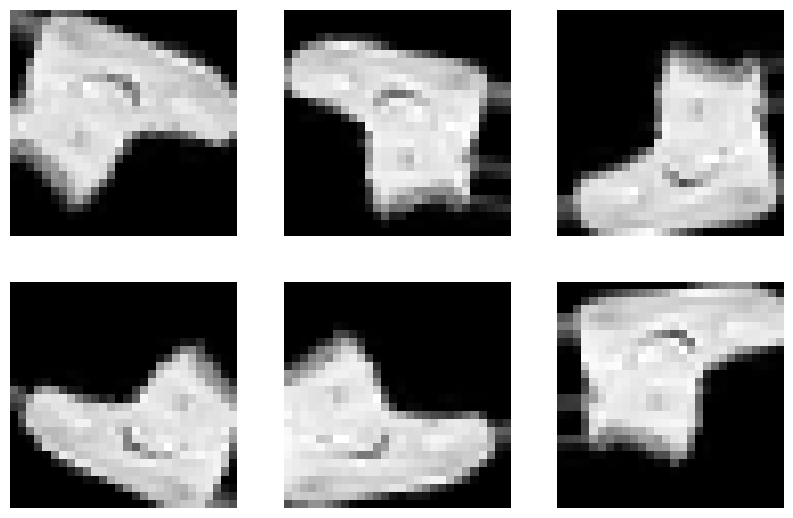

In [18]:


# Define data augmentation
data_augmentation = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)

# Generate augmented images
aug_iter = data_augmentation.flow(x_train[0].reshape(1, 28, 28, 1), batch_size=1)

def showAugmentations(augmentations=6):
    plt.figure(figsize=(10,10))
    for i in range(augmentations):
        plt.subplot(3, 3, i + 1)
        batch = next(aug_iter)  # Correct way to get the next batch
        plt.imshow(batch[0].reshape(28, 28), cmap='gray')
        plt.axis("off")
    plt.show()

showAugmentations(6)


In [19]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4251173436641693
Test accuracy: 0.9172000288963318


# Part 2 - With Regularisation

In [20]:
(x_train, y_train), (x_test, y_test)  = fashion_mnist.load_data()

In [21]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [22]:

# Now we one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Create Model with Regularisation

In [23]:

L2 = 0.001
model2 = Sequential()

model2.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_regularizer = regularizers.l2(L2),input_shape=input_shape))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = regularizers.l2(L2)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.5))
model2.add(Flatten())
model2.add(Dense(128, activation='relu',kernel_regularizer = regularizers.l2(L2)))
model.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss='categorical_crossentropy',optimizer=AdamW(learning_rate=0.0001),metrics=['accuracy'])

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,200,266 (4.58 MB)

 Trainable params: 1,200,074 (4.58 MB)

 Non-trainable params: 192 (768.00 B)

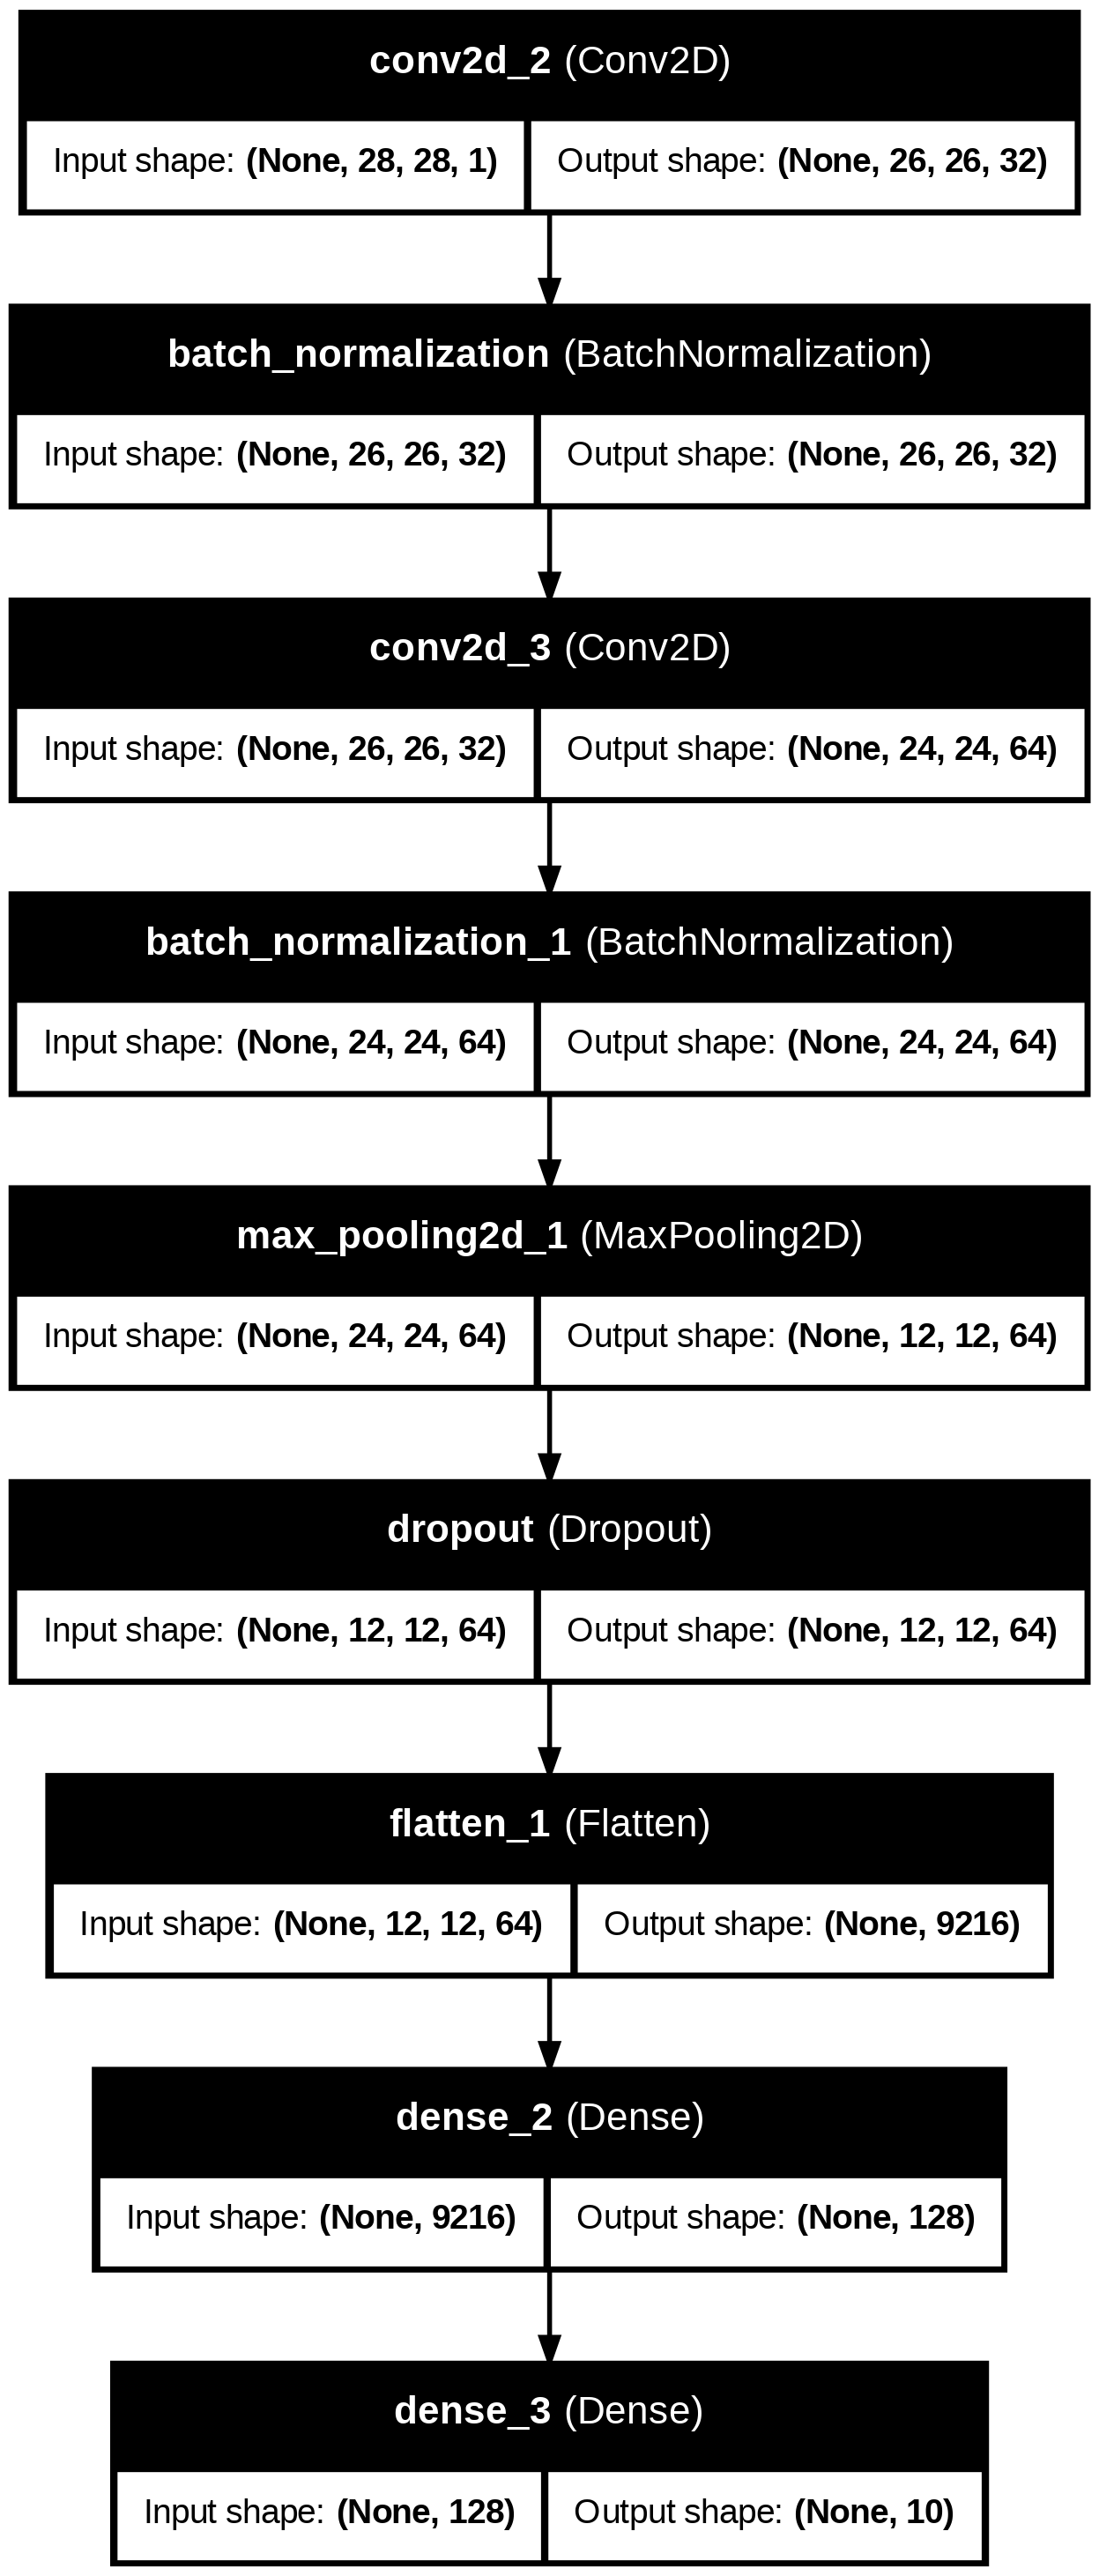

In [24]:
tf.keras.utils.plot_model(model2, to_file='model.png', show_shapes=True, show_layer_names=True)

# train Model

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Training data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.95, 1.05],
    fill_mode='nearest'
)

# Validation data normalization (no augmentation, just rescaling)
val_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32
epochs = 10


# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# Generators
train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(x_test, y_test, batch_size=batch_size)

# Fit the model
history = model2.fit(
                    train_generator,
                    epochs=epochs,
                    validation_data=val_generator,
                    verbose=1,
                    callbacks=[lr_scheduler])

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 17ms/step - accuracy: 0.5371 - loss: 1.6526 - val_accuracy: 0.7222 - val_loss: 0.9770 - learning_rate: 1.0000e-04
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.6985 - loss: 1.0852 - val_accuracy: 0.7478 - val_loss: 0.8995 - learning_rate: 1.0000e-04
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.7288 - loss: 0.9729 - val_accuracy: 0.7728 - val_loss: 0.8238 - learning_rate: 1.0000e-04
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.7524 - loss: 0.8924 - val_accuracy: 0.7666 - val_loss: 0.8281 - learning_rate: 1.0000e-04
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.7707 - loss: 0.8297 - val_accuracy: 0.7894 - val_loss: 0.7474 - learning_rate: 1.0000e-04
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.7817 - loss: 0.7843 - val_accuracy: 0.8151 - val_loss: 0.6751 - learning_rate: 1.0000e-04
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/

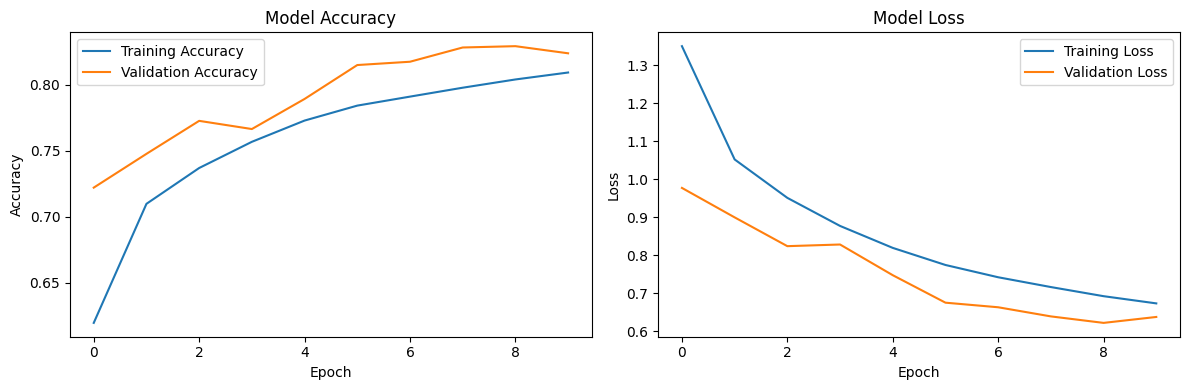

In [26]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
# Evaluate the model on the test set
test_loss, test_accuracy = model2.evaluate(val_generator,verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8242 - loss: 0.6466
Test Loss: 0.6375
Test Accuracy: 0.8240


# Fashion MNIST  With PyTorch



In [28]:
! pip install torchinfo

In [29]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
from torchinfo import summary
import PIL
from tabulate import tabulate
from tqdm import tqdm
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

# transform data

In [30]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, ), (0.5, )) ])

In [31]:
# Load our Training Data and specify what transform to use when loading
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)

# Load our Test Data and specify what transform to use when loading
testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)

In [32]:
print(trainset.data.shape)
print(testset.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


In [33]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

# Create a list with our class names
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress',
           'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

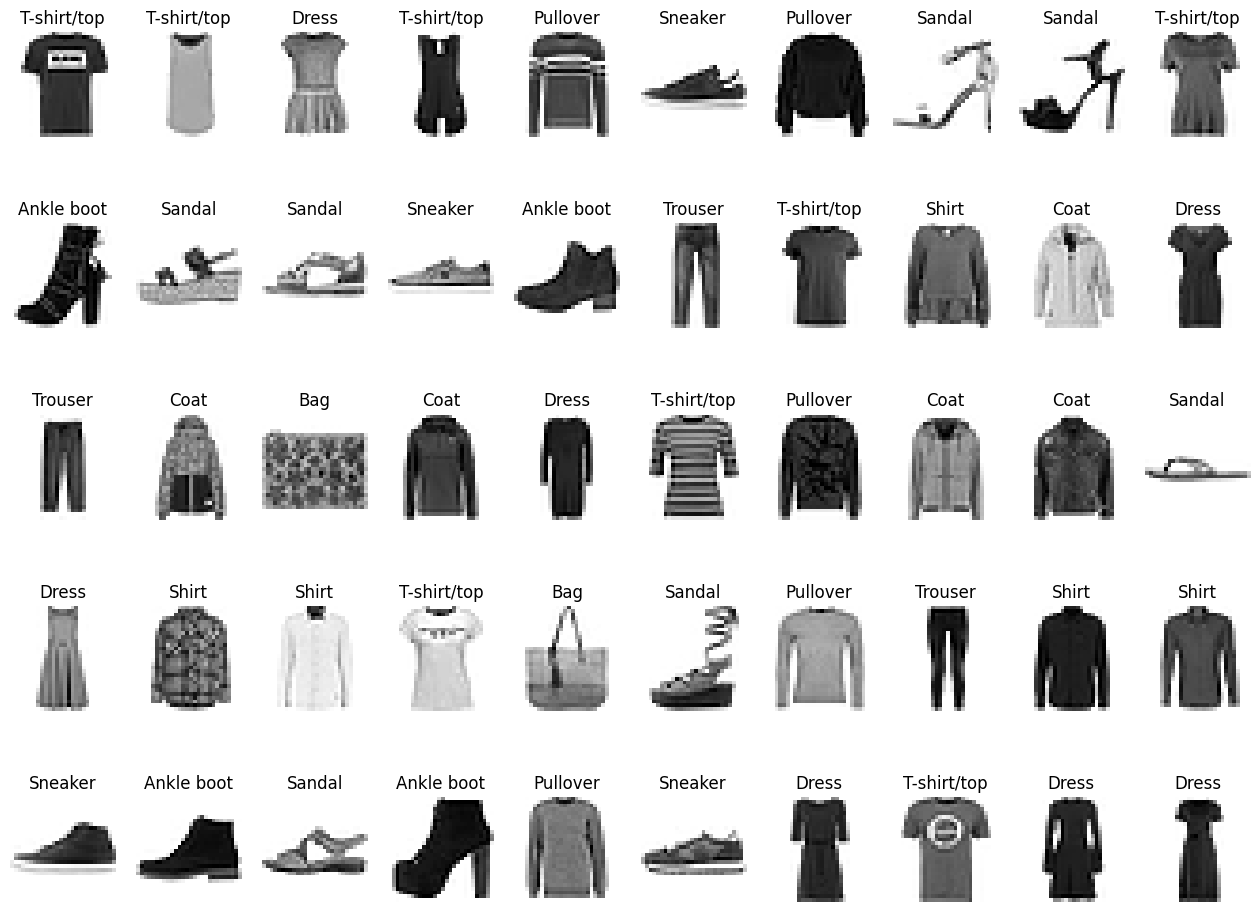

In [34]:

figure = plt.figure(figsize=(16,12))
num_of_images = 50

for index in range(1, num_of_images + 1):
    plt.subplot(5, 10, index)
    plt.axis('off')
    plt.imshow(trainset.data[index], cmap='gray_r')
    plt.title(classes[trainset.targets[index]])

plt.show()


# create Pytorch Model

In [35]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 12 * 12)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


model = Net()
model.to(device)
summary(model,input_size=(32,1,28,28))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [32, 10]                  --
├─Conv2d: 1-1                            [32, 32, 26, 26]          320
├─Conv2d: 1-2                            [32, 64, 24, 24]          18,496
├─MaxPool2d: 1-3                         [32, 64, 12, 12]          --
├─Linear: 1-4                            [32, 128]                 1,179,776
├─Linear: 1-5                            [32, 10]                  1,290
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
Total mult-adds (M): 385.63
Input size (MB): 0.10
Forward/backward pass size (MB): 15.01
Params size (MB): 4.80
Estimated Total Size (MB): 19.91

# Loss & Optimizer

In [36]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.AdamW(model.parameters(),lr=0.001)

# Training and evaluation function with tabulated output

In [ ]:


def train(model, trainloader, testloader, optimizer, criterion, num_epochs, device):
    model.to(device)

    headers = ["Epoch", "Train Loss", "Train Accuracy", "Test Loss", "Test Accuracy"]
    table = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        correct_train = 0
        total_train = 0

        with tqdm(trainloader, desc=f"Training Epoch {epoch+1}/{num_epochs}", unit="batch") as train_bar:
            for inputs, labels in train_bar:
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                train_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_train += labels.size(0)
                correct_train += (predicted == labels).sum().item()
                train_bar.set_postfix(train_loss=train_loss / (total_train / len(trainloader)),
                                      train_accuracy=100 * correct_train / total_train)

        train_loss /= len(trainloader)
        train_accuracy = 100 * correct_train / total_train

        model.eval()
        test_loss = 0.0
        correct_test = 0
        total_test = 0

        with tqdm(testloader, desc=f"Validation Epoch {epoch+1}/{num_epochs}", unit="batch") as test_bar:
            with torch.no_grad():
                for inputs, labels in test_bar:
                    inputs, labels = inputs.to(device), labels.to(device)
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    test_loss += loss.item()
                    _, predicted = torch.max(outputs.data, 1)
                    total_test += labels.size(0)
                    correct_test += (predicted == labels).sum().item()
                    test_bar.set_postfix(test_loss=test_loss / (total_test / len(testloader)),
                                         test_accuracy=100 * correct_test / total_test)

        test_loss /= len(testloader)
        test_accuracy = 100 * correct_test / total_test

        table.append([epoch+1, f"{train_loss:.4f}", f"{train_accuracy:.2f}%", f"{test_loss:.4f}", f"{test_accuracy:.2f}%"])

    print("\nTraining Summary:")
    print(tabulate(table, headers=headers, tablefmt="fancy_grid"))

    return table

history = train(model, trainloader, testloader, optimizer, criterion, num_epochs=10, device=device)

Training Epoch 2/10:   5%|▍         | 89/1875 [00:00<00:13, 132.69batch/s, train_accuracy=92.4, train_loss=12.5]

# Loss & Accuracy Graph for Pytorch Model

In [ ]:

epochs_list = [row[0] for row in history]
train_losses = [float(row[1]) for row in history]
train_accs = [float(row[2].strip('%')) for row in history]
test_losses = [float(row[3]) for row in history]
test_accs = [float(row[4].strip('%')) for row in history]

plt.figure(figsize=(10, 8))
plt.plot(epochs_list, train_accs, label='Train Accuracy')
plt.plot(epochs_list, test_accs, label='Test Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(epochs_list, train_losses, label='Train Loss')
plt.plot(epochs_list, test_losses, label='Test Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Model Accuracy

In [ ]:
correct = 0 
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        # Move our data to GPU
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {accuracy:.4}%')

# Model Prediction

In [ ]:
true_labels=[]
prediction=[]

model.eval()

with tqdm(testloader,desc="Model Prediction",unit="batch") as pred_bar:
    with torch.no_grad():
        for inputs,labels in pred_bar:
            inputs,labels=inputs.to(device),labels.to(device)
            outputs=model(inputs)
            _,predicted=torch.max(outputs.data,1)
            true_labels.extend(labels.cpu().numpy())
            prediction.extend(predicted.cpu().numpy())

In [ ]:
cm = confusion_matrix(true_labels, prediction)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='gnuplot2', cbar=True, square=True, linewidths=0.5)
plt.title('Confusion Matrix', pad=20)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Data Augmentation

In [ ]:
data_aug_transform = transforms.Compose([
    transforms.RandomAffine(degrees=10, translate=(0.05, 0.05), shear=5),
    transforms.ColorJitter(hue=0.05, saturation=0.05),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15, interpolation=transforms.InterpolationMode.BILINEAR),
    transforms.Grayscale(num_output_channels=1)
])


def showaugmentation(image, augmentation=10):
    plt.figure(figsize=(20,16))
    for i in range(augmentation):
        a = plt.subplot(1, augmentation, i+1)
        img = data_aug_transform(image)
        plt.imshow(img, cmap="Greys_r")
        plt.axis("off")
    plt.show()

image = trainset.data[0].numpy()
img_pil = PIL.Image.fromarray(image)
showaugmentation(img_pil, 8)